3DDiff file 
=========================================================================

Set values of diffusivity within canyon from another Kv file. 

K. Ramos-Musalem

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from math import *

import struct

from netCDF4 import Dataset


%matplotlib inline

In [2]:
import canyon_tools.readout_tools as rout

In [3]:
nx = 360
ny = 360
nz = 90

In [4]:
## Get grid variables
filename='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'
GridOut = Dataset(filename)

#for dimobj in GridOut.variables.values():
#    print dimobj

hFacC = rout.getField(filename,'HFacC') #(90,360,360)
hFacCmasked = np.ma.masked_values(hFacC, 0)
rA = rout.getField(filename,'rA')

drF= GridOut.variables['drF']
MASKhFacC = np.ma.getmask(hFacCmasked)


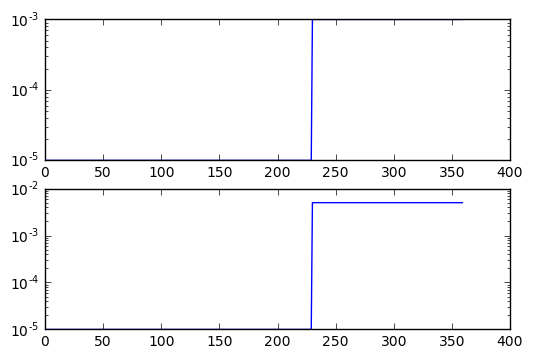

In [13]:
# Get Kv values from binary file
dt = np.dtype('>f8')  # float 64 big endian

fileNAME = "%dx%dx%d/KrDiff1E_5_1E_3_%dzlev_%dx%d_Quad.bin" %(nx,ny,nz,nz,nx,ny)

kv =np.fromfile(fileNAME, dt)
kv_new = np.fromfile(fileNAME, dt)

kv_new[kv_new == 1E-3] = 5E-3

Kv=np.reshape(kv,(nz,ny,nx),order='C')
np.shape(Kv)

Kv_new=np.reshape(kv_new,(nz,ny,nx),order='C')
np.shape(Kv_new)

fig,ax = plt.subplots(2,1)

p1 = ax[0].plot(Kv[29,:,180])

ax[0].set_yscale('log')
p2 = ax[1].plot(Kv_new[29,:,180])
ax[1].set_yscale('log')
plt.show()

In [14]:
# Save binary file
filename = "%dx%dx%d/KrDiff1E_5_5E_3_%dzlev_%dx%d_Quad.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(filename,mode='wb')
kv_new.astype(dt).tofile(fileobj,"")
fileobj.close()


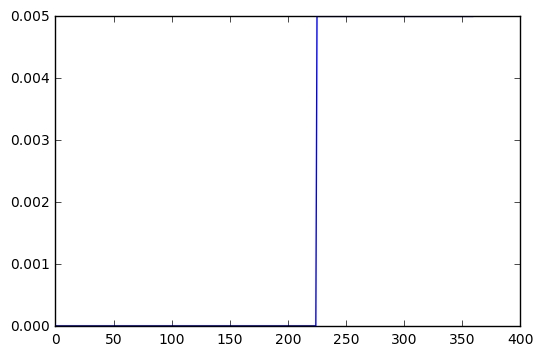

In [15]:
# Get Kv values from binary file
dt = np.dtype('>f8')  # float 64 big endian

kv_check = np.fromfile(filename, dt)


Kv_check= np.reshape(kv_check,(nz,ny,nx),order='C')
np.shape(Kv_check)


fig,ax = plt.subplots(1,1)

p1 = ax.plot(Kv_check[30,:,180])

plt.show()